# SPAM EMAIL CLASSIFIER USING RANDOM FOREST CLASSIFIER

# Step 1: Import Required Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from termcolor import colored
from sklearn.linear_model import LogisticRegression


# Step 2: Load Dataset and Preview

In [3]:
# Load dataset
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]

# Show the first 5 rows
df.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#  Step 3: Rename Columns

In [4]:
df.columns = ['label', 'text']  # Rename for clarity

df.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Step 4: Label Encoding (ham → 0, spam → 1)

In [5]:
# Encode labels
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Check the distribution
df['label'].value_counts()




label
ham     4825
spam     753
Name: count, dtype: int64

# Step 5: Check for Missing Values

In [6]:
# Check if any text is missing
df.isnull().sum()


label            0
text             0
label_encoded    0
dtype: int64

# Step 6: Visualize Label Distribution

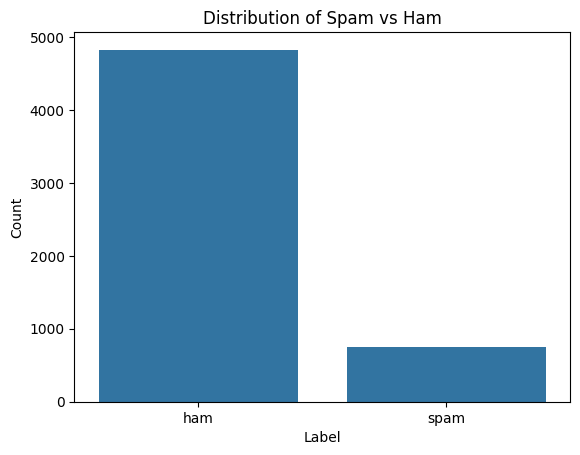

In [7]:
sns.countplot(x='label', data=df)
plt.title("Distribution of Spam vs Ham")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# Step 7: Split Dataset into Train and Test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label_encoded'], test_size=0.2, random_state=42
)

print(f"Training Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")


Training Samples: 4462
Testing Samples: 1116


# Step 8: TF-IDF Vectorization

In [9]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.9, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF vectorization complete.")
print("Shape of training vectors:", X_train_tfidf.shape)
print("Shape of testing vectors:", X_test_tfidf.shape)


TF-IDF vectorization complete.
Shape of training vectors: (4462, 31454)
Shape of testing vectors: (1116, 31454)


#  Step 9: Train Random Forest Classifier

In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)


RandomForestClassifier(random_state=42)

# Step 10: Evaluate Model

In [14]:
y_pred = rf.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9695


In [15]:
y_pred = lr.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9498


# Step 11:  Compare predictions with actual

In [25]:
# Compare predictions with actual
comparison_df = pd.DataFrame({
    'Text': X_test.values,
    'Actual': le.inverse_transform(y_test),
    'Predicted': le.inverse_transform(y_pred)
})

comparison_df.sample(10)


,Text,Actual,Predicted
991,I wish that I was with you. Holding you tightl...,ham,ham
73,"Edison has rightly said, \A fool can ask more ...",ham,ham
182,I keep ten rs in my shelf:) buy two egg.,ham,ham
352,Wanna do some art?! :D,ham,ham
467,Oh ok.. Wat's ur email?,ham,ham
831,WINNER! As a valued network customer you hvae ...,spam,spam
1101,7 at esplanade.. Do Ì_ mind giving me a lift c...,ham,ham
944,If you're thinking of lifting me one then no.,ham,ham
189,Good afternoon on this glorious anniversary da...,ham,ham
607,", ow u dey.i paid 60,400thousad.i told u woul...",ham,ham


# Step 12: Save model and vectorizer

In [26]:

joblib.dump(rf, 'spam_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

# Step 13: Load Model and Run User Input

In [27]:
# Load model and vectorizer
rf = joblib.load('spam_model.pkl')
tfidf = joblib.load('tfidf_vectorizer.pkl')
le = joblib.load('label_encoder.pkl')

# Step 14: User Input Email and predict output

In [ ]:
# Simulate user email input
user_email = input("📩 Paste your email content here (or type 'exit' to quit):\n")

if user_email.lower() == 'exit':
    print("👋 Exiting program. Thank you!")
else:
    # Transform input
    email_tfidf = tfidf.transform([user_email])

    # Predict
    predicted = rf.predict(email_tfidf)[0]
    label = le.inverse_transform([predicted])[0]

# Step 15: Predict Spam or Ham

In [15]:
# Transform input
email_tfidf = tfidf.transform([user_email])

# Predict
predicted = rf.predict(email_tfidf)[0]
label = le.inverse_transform([predicted])[0]

# Output result
if label == "spam":
    print(colored("⚠️ [SPAM DETECTED] → Email sent to Spam Box", "red"))
else:
    print(colored("✅ [HAM] → Email sent to Inbox", "green"))

⚠️ [SPAM DETECTED] → Email sent to Spam Box
